Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'DOT1'
against_currency = 'USD'

start = dt.datetime(2014,1,1)
end = dt.datetime.now()

base_df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-19,3.077784,2.692896,2.787857,2.900080,4.881987e+07,2.900080
2020-08-20,3.090093,2.730919,2.896923,2.875028,4.931314e+07,2.875028
2020-08-21,4.510613,2.816762,2.878570,4.484690,4.858011e+08,4.484690
2020-08-22,4.487058,3.716271,4.487058,3.967066,3.207495e+08,3.967066
2020-08-23,4.783158,3.812670,3.987413,4.602614,4.076902e+08,4.602614
...,...,...,...,...,...,...
2021-06-16,23.996916,22.015537,23.017530,22.511454,1.236018e+09,22.511454
2021-06-17,22.565636,20.273529,22.547190,21.398895,1.406342e+09,21.398895
2021-06-18,21.654121,20.313393,21.450775,20.355942,9.975537e+08,20.355942


In [3]:
base_df['Spread'] = base_df.High - base_df.Low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 286 entries, 2020-08-19 to 2021-06-22
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       286 non-null    float64
 1   Low        286 non-null    float64
 2   Open       286 non-null    float64
 3   Close      286 non-null    float64
 4   Volume     286 non-null    float64
 5   Adj Close  286 non-null    float64
 6   Spread     286 non-null    float64
dtypes: float64(7)
memory usage: 17.9 KB


## Plot the closing value of Polkadot over time

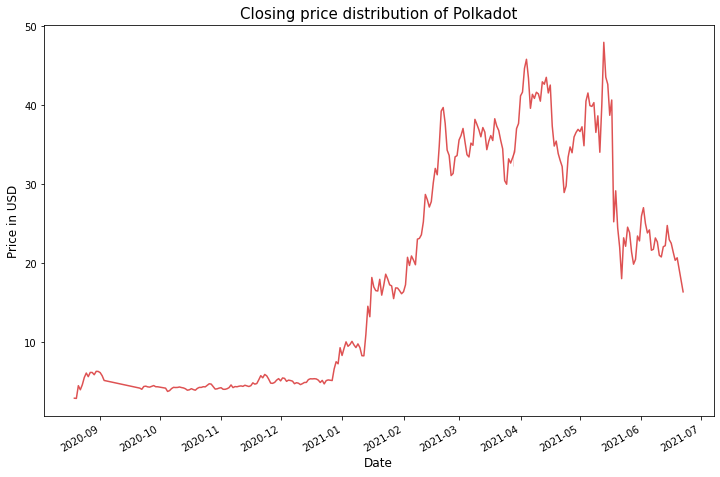

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.Close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of Polkadot", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
import mplfinance as mpf

#base_df['Date_mpl'] = base_df['Date'].apply(lambda x: mdates.date2num(x))

temp_base_df = base_df.copy(deep=False)
#temp_base_df = temp_base_df.set_index(['Date'])
temp_base_df = temp_base_df.drop(['Spread'], axis=1)
temp_base_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-19,3.077784,2.692896,2.787857,2.900080,4.881987e+07,2.900080
2020-08-20,3.090093,2.730919,2.896923,2.875028,4.931314e+07,2.875028
2020-08-21,4.510613,2.816762,2.878570,4.484690,4.858011e+08,4.484690
2020-08-22,4.487058,3.716271,4.487058,3.967066,3.207495e+08,3.967066
2020-08-23,4.783158,3.812670,3.987413,4.602614,4.076902e+08,4.602614
...,...,...,...,...,...,...
2021-06-16,23.996916,22.015537,23.017530,22.511454,1.236018e+09,22.511454
2021-06-17,22.565636,20.273529,22.547190,21.398895,1.406342e+09,21.398895
2021-06-18,21.654121,20.313393,21.450775,20.355942,9.975537e+08,20.355942


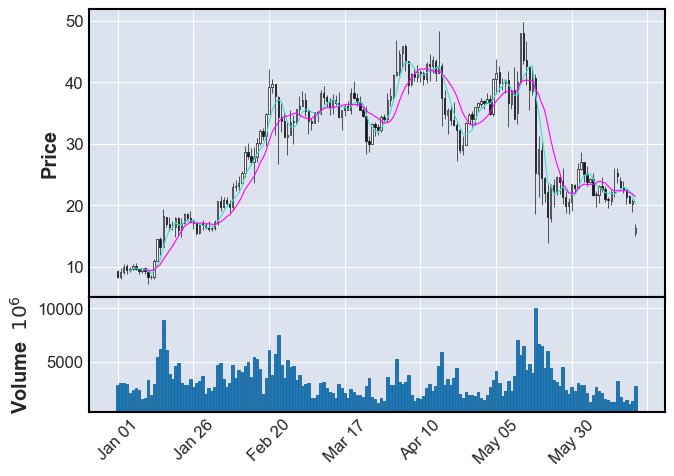

In [6]:
mpf.plot(temp_base_df.loc['2021-1-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
price_predict_df = base_df['Close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2021-1-1']
price_predict_df

,ds,y
115,2021-01-02,9.208837
116,2021-01-03,10.033282
117,2021-01-04,9.469611
118,2021-01-05,9.701655
119,2021-01-06,10.096068
...,...,...
281,2021-06-16,22.511454
282,2021-06-17,21.398895
283,2021-06-18,20.355942
284,2021-06-19,20.672365


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
172,2021-06-25,14.963424,10.593037,19.505113
173,2021-06-26,14.827791,10.289430,19.226861
174,2021-06-27,13.990835,9.517903,18.413241
175,2021-06-28,13.891882,9.472643,18.038580
176,2021-06-29,12.907631,8.542095,17.392479


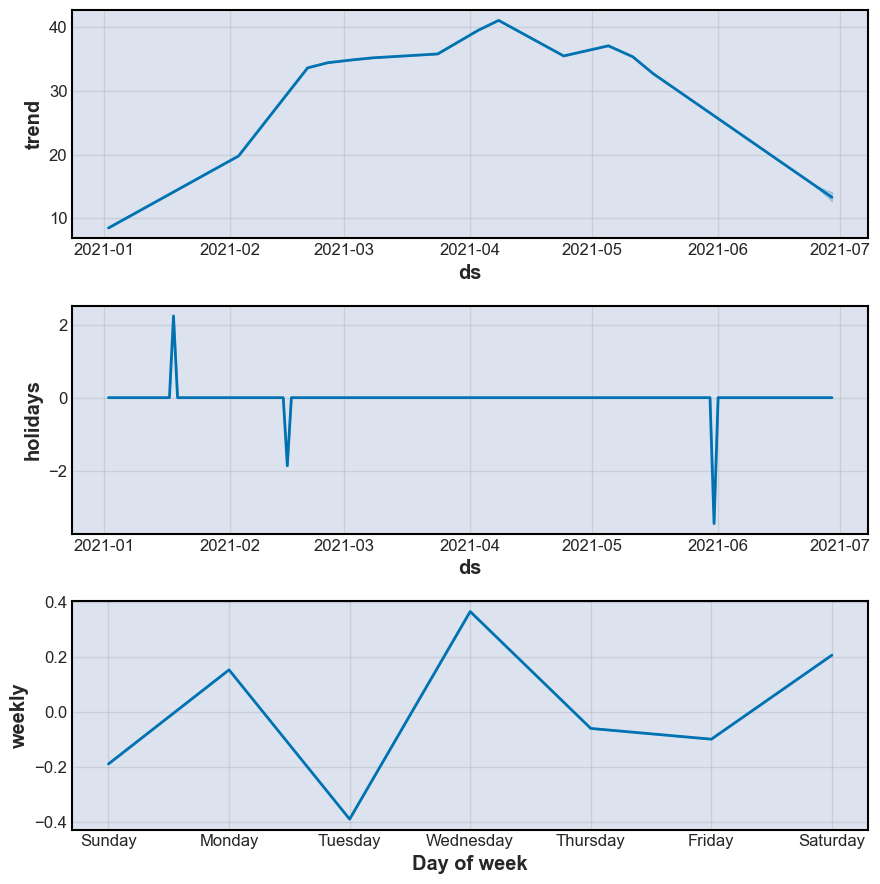

In [9]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=7)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

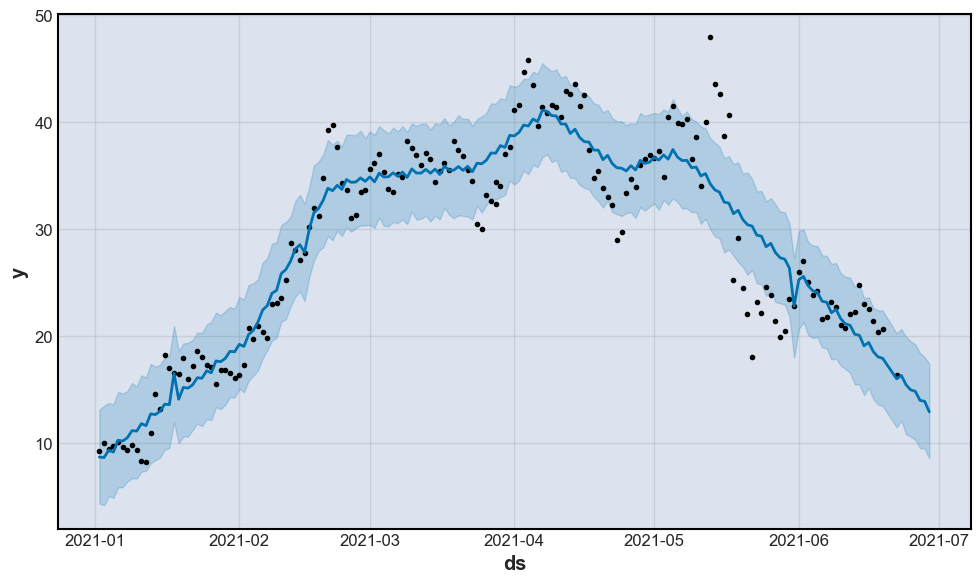

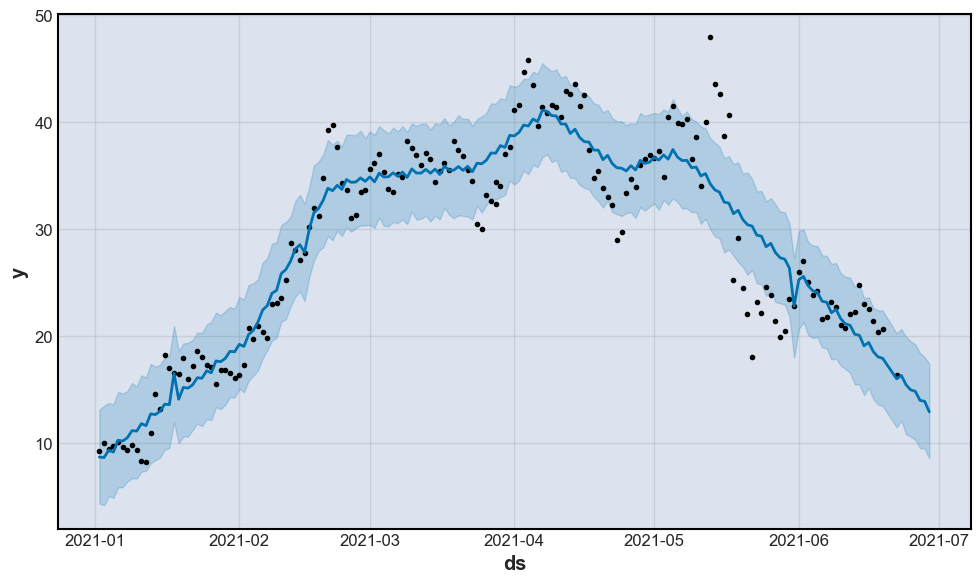

In [10]:
m.plot(forecast)